In [1]:
import pickle
import torch
import networkx as nx
import torch.nn as nn
import matplotlib.pyplot as plt
from functions import AMLDataPreprocessing
import torch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# LOADING GRAPH from Jupyter Notebook 
\(only use if not using Class Preprocessor)

Data Head - <bound method NDFrame.head of              Timestamp  From Bank    Account  To Bank  Account.1  \
0     2022/09/01 00:12      47640  811D69990    47640  811D69990   
1     2022/09/14 12:37      19329  808B1C350     1412  809F49D20   
2     2022/09/03 11:29      17769  8128ED040   223240  8128E8980   
3     2022/09/09 18:44      11899  80532AFB0    29620  80AE51B90   
4     2022/09/04 04:40      27444  80B3BFFD0    11405  80B3D2700   
...                ...        ...        ...      ...        ...   
9995  2022/09/08 09:49      31149  80EB13650    15447  80E0555C0   
9996  2022/09/09 19:44       1362  8001E3BE0     1467  8003F4070   
9997  2022/09/03 00:07     146167  812A57E10    23885  80224DF50   
9998  2022/09/11 17:22       1292  800DF7070        1  8019C00E0   
9999  2022/09/05 09:05         12  800499810    21611  8016625C0   

      Amount Received Receiving Currency  Amount Paid   Payment Currency  \
0               12.57          US Dollar        12.57          US

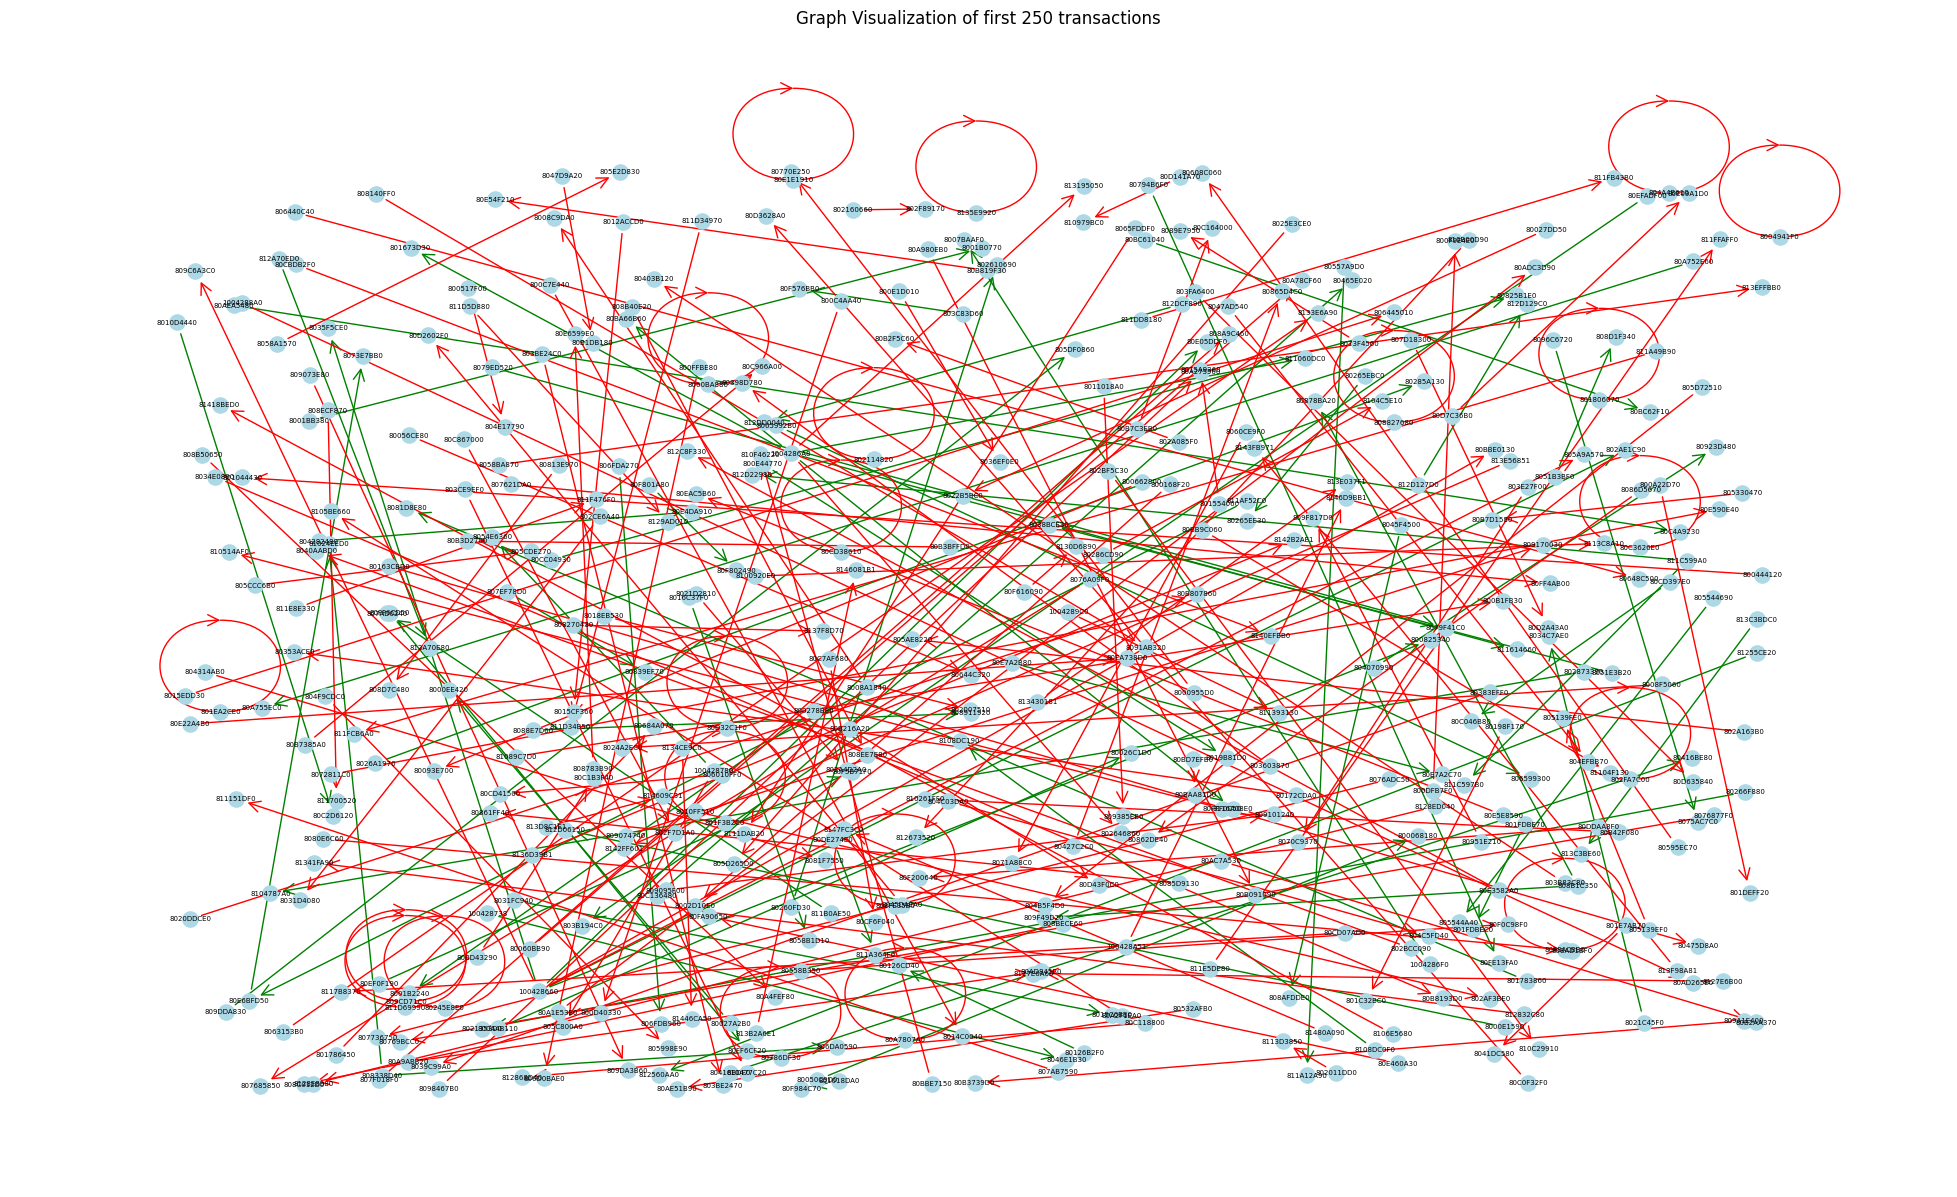

input data: Data(x=[15899, 44], edge_index=[2, 10000], edge_attr=[10000, 40], y=[10000])
time_closeness element: tensor([0.2409, 0.9946, 0.2409,  ..., 0.2409, 0.2409, 0.2409])


In [2]:
dataset = "HI-Small_Trans_balanced"

filename = f'/Users/owhy/Documents/Datasets/{dataset}.csv'
# Create an instance of the AMLDataPreprocessing class
data_preprocessor = AMLDataPreprocessing(filename)
# Process the data
input_data, graph_full, x, y, labels, links, edges_amount, node_features, edges_features, time_closeness = data_preprocessor.process_data()
# Visualize
visual = data_preprocessor.visualize_graph(links, labels)

adjacency_matrix = torch.from_numpy(nx.adjacency_matrix(graph_full).todense()).to(torch.float)

print(f"input data: {input_data}")
print(f"time_closeness element: {time_closeness}")

In [3]:
with open("Saved-Data/graph.pickle", "wb") as f:
    pickle.dump({
        'dataset': dataset,
        'visual': visual,
        'edges_features': edges_features,
        'links': links,
        'graph_full': graph_full,
        'adjacency_matrix': adjacency_matrix,
        'node_features': node_features,
        'labels': labels,
        'input_data': input_data,
        'x': x,
        'y': y,
        'time_closeness': time_closeness
    }, f)